# Explore preprocessed Kickstarter data

### _Lukas Vlcek_

Get to know basic statistics, distributions, and correlations in the data.

## 1. Setup

## Notebook configuration

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

## Create a dataframe from a pre-processed CSV file

In [2]:
target_path = '../data/interim/kickstarter_csvs'
filename = 'kick_id.csv'

In [3]:
# list of columns, which should be in datetime format
datecols = ['created_at', 'deadline', 'state_changed_at', 'launched_at']

In [4]:
# Function for converting from a timestamp to a datetime string
fdatpars = lambda x: datetime.datetime.fromtimestamp(int(x)).strftime('%Y-%m-%d %H:%M:%S')

In [5]:
# Read-in a pre-processed CSV file, index based on project ID
df = pd.read_csv(os.path.join(target_path, filename), index_col='id', parse_dates=datecols, date_parser=fdatpars)

In [6]:
# Remove useless column 'disable_communication' - equivalent to state=suspended.
df = df.drop(['disable_communication'], axis='columns')

## Look at the DF properties and contents

In [7]:
# DataFrame dimensions
df.shape

(263765, 17)

In [8]:
# Columns and their types
df.dtypes

name                        object
goal                       float64
pledged                    float64
usd_pledged                float64
state                       object
slug                        object
country                     object
currency                    object
deadline            datetime64[ns]
state_changed_at    datetime64[ns]
created_at          datetime64[ns]
launched_at         datetime64[ns]
staff_pick                    bool
backers_count                int64
blurb                       object
spotlight                     bool
category                    object
dtype: object

In [9]:
# Look at the data
df.head(2)

,name,goal,pledged,usd_pledged,state,slug,country,currency,deadline,state_changed_at,created_at,launched_at,staff_pick,backers_count,blurb,spotlight,category
id,,,,,,,,,,,,,,,,,
18520,Grandma's are Life,15000.0,62.0,62.000000,failed,grandmas-are-life,US,USD,2016-11-18 09:32:40,2016-11-18 09:32:40,2016-10-19 08:13:18,2016-10-19 09:32:40,False,4,Raising money to help my grandmother recover f...,False,music/world music
21109,Meta,150.0,173.0,258.036032,successful,meta,GB,GBP,2015-05-06 17:00:00,2015-05-06 17:00:12,2015-04-07 10:07:05,2015-04-07 18:37:44,False,11,My work is performance based but I branch out ...,True,art/performance art


## 2. Basic statistics for different features (columns)

successful    111814
failed        111621
live           24357
canceled       15021
suspended        952
Name: state, dtype: int64


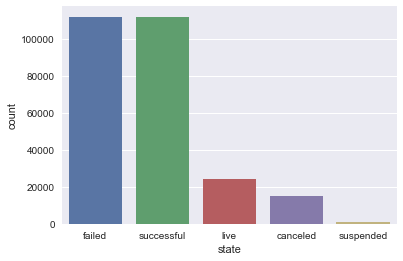

In [10]:
# State of the projects success, fail, ...
print(df['state'].value_counts())
sns.countplot(x='state', data=df)

### Notes
* About half the projects were successful (the funding process)
* This does not seem to match the info I got before (~34%) - why?
* I may have deleted resubmittals during preprocessing ??? - not likely, but look into it

### Closer look at the category property

In [11]:
# number of different categories
df['category'].value_counts().shape[0]

169

In [12]:
df['category'].value_counts()

design/product design          12477
games/tabletop games            9707
games/video games               8869
publishing/fiction              8032
film & video/documentary        7299
publishing/nonfiction           7152
film & video/shorts             7120
fashion/apparel                 6806
technology/apps                 6298
publishing/children's books     6289
music/rock                      6199
music/indie rock                5332
film & video/webseries          5205
film & video/narrative film     4929
music/country & folk            4500
music/hip-hop                   3918
technology/web                  3914
technology/hardware             3703
music/pop                       3366
fashion/accessories             3345
art/painting                    3325
art/illustration                3294
technology/gadgets              3104
art/public art                  3093
technology/software             3065
comics/comic books              2870
food/restaurants                2869
a

#### Make coarse-grained category types for easier grouping based on the description before '/'

In [13]:
# make a list of general category types
cat_type = [x.split('/')[0] for x in df['category'].values]
print('Lengths of cat_type and category should be the same: ', len(cat_type), '<>', df['category'].shape[0])

Lengths of cat_type and category should be the same:  263765 <> 263765


#### Add the category type to the dataframe

In [14]:
df['cat_type'] = np.array(cat_type)

#### Category type statistics

In [15]:
# Counts of different category types
print('Number of category types:', df['cat_type'].value_counts().shape[0])
print(df['cat_type'].value_counts())

Number of category types: 15
film & video    39441
music           36476
publishing      31807
technology      26736
games           25599
art             21090
design          16558
fashion         16024
food            15688
comics           8078
photography      6847
theater          6289
crafts           5743
journalism       4302
dance            3087
Name: cat_type, dtype: int64


### Money - goals and pledges (promised funding)

In [16]:
df['goal'].describe()

count    2.637650e+05
mean     4.671028e+04
std      1.139242e+06
min      1.000000e-02
25%      2.000000e+03
50%      5.000000e+03
75%      1.500000e+04
max      1.000000e+08
Name: goal, dtype: float64

In [17]:
df['usd_pledged'].describe()

count    2.637650e+05
mean     1.085461e+04
std      1.029759e+05
min      0.000000e+00
25%      4.842330e+01
50%      9.250000e+02
75%      5.125000e+03
max      2.033899e+07
Name: usd_pledged, dtype: float64

In [18]:
n_max = df.loc[df['goal'] == 1e8]['category'].shape[0]
print('Number of maximum goals:', n_max)
df.loc[df['goal'] == 1e8]['category'].value_counts()

Number of maximum goals: 23


journalism/video                2
film & video/drama              2
film & video/movie theaters     2
film & video/documentary        1
games/live games                1
film & video/animation          1
fashion/apparel                 1
technology/web                  1
film & video/horror             1
publishing/young adult          1
film & video/action             1
technology/software             1
film & video/fantasy            1
art/illustration                1
technology/space exploration    1
food/restaurants                1
film & video/science fiction    1
art/painting                    1
games/video games               1
design/architecture             1
Name: category, dtype: int64

### Look at the extreme goals - what are they thinking?

In [19]:
df_max = df.loc[df['goal'] == 1e8][['name','category','usd_pledged','backers_count','country','blurb']].sort_values(by='category').reset_index()
df_max

,id,name,category,usd_pledged,backers_count,country,blurb
0,1720842777,NAKED FASHION ART,art/illustration,0.000000,0,CA,Fashion illustration as a portrait.
1,208731425,Animal - The Bear Life Journey,art/painting,10.000000,1,US,Fine Art By Kyle South
2,601594365,The Multi-Trillion Dollar Dream™ (Canceled),design/architecture,1.000000,1,US,We are designing The Multi-Trillion Dollar Dre...
3,388031956,UniqueTrends,fashion/apparel,1.000000,1,US,UniqueTrends. Lasting memories that never go ...
4,308045282,Jesus Priest,film & video/action,0.799988,1,CA,This is NOT a religious movie project despite ...
5,962949560,"""PG"" Reanimated Cartoons Tha Movie",film & video/animation,0.000000,0,US,"This cartoon is about the main character ""PG"" ..."
6,843636303,"The Exodus, one Ark or many.",film & video/documentary,13.000000,4,US,To purchase cruise ships and redesign them to ...
7,2000749004,A Celtic Lovestory,film & video/drama,0.000000,0,GB,"A 2000 year old ""Romeo & Juliet"" love story, s..."
8,1485385229,This Land Called America,film & video/drama,26.754190,3,SE,A feature film based around the script This La...
9,1168153740,Sage: Warrior Of The Fallen Gods (Movie),film & video/fantasy,0.000000,0,US,"Sage: Warrior Of The Fallen Gods, The rise and..."


* Flat Earth (17)
* Give me millions and let me write about it (19)
* New currency (20)
* Trump (18)
* Higher percentage of the extreme goals seems to come from outside US

In [20]:
# Flat Earth
print(df_max.loc[17][6])

Help us raise money for an expedition to the Antarctic. We will document and study the edge of the Earth. Let's finally prove its flat!


In [21]:
# Billionaire boy
print(df_max.loc[19][6])

An exclusive blog about a 18 year old millionaire.
The blod will consist of fashion, cars, sport, travelling and much more.


In [22]:
# New currency
print(df_max.loc[20][6])

CF is an independent currency system and a trading tool that runs parallel to all existing currency systems.


In [23]:
# Trump
print(df_max.loc[18][6])

You might be asking why I decided to call it "Trump Media," well its simple. Our media will "trump" the lame stream media


In [24]:
# US vs WORLD
us_max  = df.loc[(df['goal'] == 1e8) & (df['country'] == 'US')].shape[0]
world_max = df.loc[(df['goal'] == 1e8)].shape[0]
us_all  = df.loc[df['country'] == 'US'].shape[0]
world_all = df.shape[0]

print('All goals - US/World:', us_all/world_all)
print('Max goals - US/World:', us_max/world_max)

All goals - US/World: 0.7719674710443007
Max goals - US/World: 0.5652173913043478


### Some other count statistics

Number of countries: 22


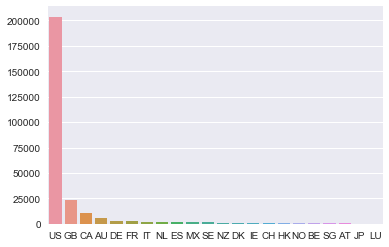

In [25]:
# Number of projects from different countries
print('Number of countries:', df['country'].value_counts().shape[0])
a = df['country'].value_counts()
sns.barplot(a.index, a.values)

In [26]:
# How often staff picks a project?
df['staff_pick'].value_counts()

False    234750
True      29015
Name: staff_pick, dtype: int64

In [27]:
# How often is a project highlighted
df['spotlight'].value_counts()

False    151951
True     111814
Name: spotlight, dtype: int64

## 3. Relations and correlations in the data

### Goals vs. pledged

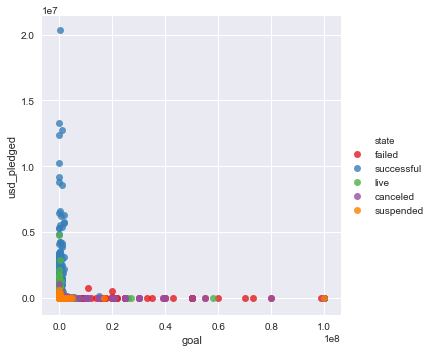

In [28]:
sns.lmplot(x='goal', y='usd_pledged', hue='state', data=df, fit_reg=False, palette='Set1')

* There seems to be inverse relationship between the goal and amount pledged
* Successful funding campain should be easier with lower target, but asking less also helps to get more money
* Lowballing a good strategy?
    * May get staff endorsment
    * Better perception of achievability
    * Large funding goals scare people away
    * Large funding goals may be correlate with poor planning or crackpot ideas?

## Staff picks, highlight - are they predictive?

In [29]:
n_SxP = df.loc[(df['state'] == 'successful') & (df['staff_pick'] == True)].shape[0]
n_FxP = df.loc[(df['state'] == 'failed') & (df['staff_pick'] == True)].shape[0]
n_SxN = df.loc[(df['state'] == 'successful') & (df['staff_pick'] == False)].shape[0]
n_FxN = df.loc[(df['state'] == 'failed') & (df['staff_pick'] == False)].shape[0]
n_S = df.loc[(df['state'] == 'successful')].shape[0]
n_F = df.loc[(df['state'] == 'failed')].shape[0]
print("Success rate of a random project:      ", n_S/(n_S+n_F))
print("Success rate of a staff-picked project:",n_SxP/(n_SxP + n_FxP))
print("Success rate of a non-picked project:  ",n_SxN/(n_SxN + n_FxN))

Success rate of a random project:       0.5004318929442567
Success rate of a staff-picked project: 0.8619829862129657
Success rate of a non-picked project:   0.4501664432130422


* Can a predictive model beat that?
* Can a model predict a staff pick?

In [30]:
n_SxS = df.loc[(df['state'] == 'successful') & (df['spotlight'] == True)].shape[0]
n_FxS = df.loc[(df['state'] == 'failed') & (df['spotlight'] == True)].shape[0]
n_SxN = df.loc[(df['state'] == 'successful') & (df['spotlight'] == False)].shape[0]
n_FxN = df.loc[(df['state'] == 'failed') & (df['spotlight'] == False)].shape[0]
print("Success rate of a spotlighted project    :",n_SxS/(n_SxS + n_FxS))
print("Success rate of a non-spotlighted project:",n_SxN/(n_SxN + n_FxN))

Success rate of a spotlighted project    : 1.0
Success rate of a non-spotlighted project: 0.0


* Looks like projects are spotlighted only after they have succeeded

In [31]:
# correlation of success with staff_pick and spotlight
succ = df.state == 'successful'
print('Fraction of succesful projects:', succ.sum()/len(succ))
print('Staff pick vs. success:', df.staff_pick.corr(succ))
print('Spotlight vs. success:', df.spotlight.corr(succ))

Fraction of succesful projects: 0.42391522757
Staff pick vs. success: 0.274811681842
Spotlight vs. success: 1.0


* Spotlight may be much more predictive (depending what it actually is - will have to find out!)
* Just few misclassifications
* Is spotlight only chosen for successful projects?
* Revisit the correlations

### Fun with countries - any general characteristics?

(0, 1000000.0)

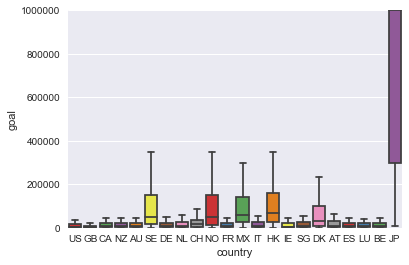

In [32]:
sns.boxplot(x='country', y='goal', data=df, palette='Set1', fliersize=0)
plt.ylim(0,1e6)

(0, 20000.0)

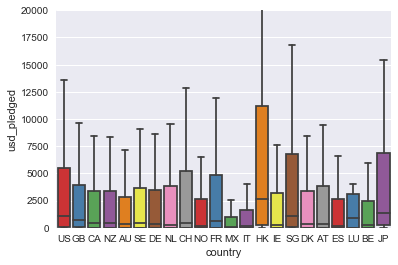

In [33]:
sns.boxplot(x='country', y='usd_pledged', data=df, palette='Set1', fliersize=0)
plt.ylim(0,2e4)

* 22 countries 
* Asian countries (HK, SG, JP) get a lot, no matter how much they ask
* Hong Kong asks a lot and gets a lot
* Japanese ask the most, get good funding (could there be some currency mess-up with Japanese Yen?)
* Singapore (SG) and Swiss (CH) don't ask much, but get a lot 
* Scandinavian countries ask a lot - get same as other Europeans
* Mexicans ask a lot, get the least
* Americans don't ask much, but still are funded well

Can unsupervised methods group countries by their geography?
* What decides? - culture, GDP, types of popular projects

#### Other notes
* Find a function that may describe positive feedback - the more you have been funded, the more likely you will get more
* May need to collect funding of the same project over time to see the rise in funding

In [34]:
df.loc[(df['country'] == 'JP')]['cat_type'].value_counts()

design          19
games           16
technology      11
fashion          9
film & video     8
music            8
photography      2
theater          1
art              1
publishing       1
crafts           1
Name: cat_type, dtype: int64

In [35]:
df.loc[(df['country'] == 'DK')]['cat_type'].value_counts()

technology      177
design          106
film & video     86
music            79
art              74
publishing       73
games            71
fashion          65
food             39
crafts           25
photography      24
journalism       20
theater          13
comics           11
dance             3
Name: cat_type, dtype: int64

In [42]:
df.loc[(df['country'] == 'MX')]['cat_type'].value_counts()

film & video    285
technology      190
music           186
publishing      145
art             136
games           126
design           84
food             81
fashion          67
theater          63
crafts           46
journalism       33
comics           31
photography      24
dance            21
Name: cat_type, dtype: int64

* Japan - heavily in tehcnology may correlated with higher financial cost
* Denmark - typical?
* Mexico - relatively more in art/craft/dance
* Plot these as a barchart for select countries

In [37]:
#ct_jp = df.loc[(df['country'] == 'JP')]['cat_type'].value_counts()
#ct_mx = df.loc[(df['country'] == 'MX')]['cat_type'].value_counts()
#ct_dk = df.loc[(df['country'] == 'DK')]['cat_type'].value_counts()
#df_ct = pd.DataFrame()
#df_ct['jp'] = ct_jp
#df_ct['mx'] = ct_mx
#df_ct['dk'] = ct_dk
#df_ct = df_ct[['jp','mx','dk']].transform(lambda x: x / x.sum())

In [41]:
#plt.figure(1, (15,10))
#plt.subplot(1, 2, 1)
#sns.barplot(ct_jp.index, ct_jp.values/np.sum(ct_jp.values), color='purple', alpha=0.5)
#sns.barplot(ct_dk.index, ct_dk.values/np.sum(ct_dk.values), color='blue', alpha=0.5)
#plt.title("Denmark (blue) vs  Japan (purple)")
#plt.xticks(rotation=90)
#plt.subplot(1, 2, 2)
#sns.barplot(ct_mx.index, ct_mx.values/np.sum(ct_mx.values), color='green', alpha=0.5)
#sns.barplot(ct_dk.index, ct_dk.values/np.sum(ct_dk.values), color='blue', alpha=0.5)
#plt.title("Denmark (blue) vs Mexico (green)")
#plt.xticks(rotation=90)